In [43]:
using Revise
using MajoranaPropagation
using PauliPropagation

using Plots 
using LaTeXStrings
using ProgressMeter
using TimerOutputs
using Base.Threads

@show nthreads()

nthreads() = 4


4

In [44]:
nx = 4 
ny = 4
nspinful = nx * ny 
topo = rectangletopology(nx, ny)

U = 1.
t = 0.5
dt = 0.1 

circ_single = []
thetas_single = []

#up hoppings 
for (i, j) in topo
    push!(circ_single, FermionicGate(:hopup, [i, j]))
    push!(thetas_single, -t * dt)
end

#down hoppings 
for (i, j) in topo
    push!(circ_single, FermionicGate(:hopdn, [i, j]))
    push!(thetas_single, -t * dt)
end

#on-site repulsion 
for i = 1:nspinful
    push!(circ_single, FermionicGate(:nupndn, i))
    push!(thetas_single, U * dt)
end


In [45]:
msum = MajoranaSum(nspinful, :nupndn, 3)
id_val = pop_id!(msum)
@show msum
@show id_val

msum = MajoranaSum with 3 term(s):(
    0.25 * 0000000011000000000000000000000000000000000000000000000000000000
    -0.25 * 0000000011110000000000000000000000000000000000000000000000000000
    0.25 * 0000000000110000000000000000000000000000000000000000000000000000)
id_val = 0.25


0.25

In [46]:
multi_msum = MajoranaSumMulti(msum)

@show multi_msum.MultiMajoranas

multi_msum.MultiMajoranas = Dict{Int64, Dict{UInt64, Float64}}(4 => Dict(0x0000000000000f00 => -0.25), 2 => Dict(0x0000000000000300 => 0.25, 0x0000000000000c00 => 0.25))


Dict{Int64, Dict{UInt64, Float64}} with 2 entries:
  4 => Dict(0x0000000000000f00=>-0.25)
  2 => Dict(0x0000000000000300=>0.25, 0x0000000000000c00=>0.25)

In [47]:
min_abs_coeff = 1.e-6

n_reps = 12

times_multi = zeros(n_reps)
times_normal = zeros(n_reps)
lengths_multi = zeros(n_reps)
lengths_normal = zeros(n_reps)

for k = 1:n_reps
    println("------")
    # multisum 
    times_multi[k] = @elapsed  propagate!(circ_single, multi_msum, thetas_single; min_abs_coeff=min_abs_coeff)
    #println(gfhj)
    #normal mode 
    times_normal[k] = @elapsed  propagate!(circ_single, msum, thetas_single; min_abs_coeff=min_abs_coeff)
    @show times_multi[k]
    @show times_normal[k]
    show_stats(multi_msum)
    #@show length(multi_msum)
    @show length(msum)
    lengths_multi[k] = length(multi_msum)
    lengths_normal[k] = length(msum)
end

------
times_multi[k] = 0.001352875
times_normal[k] = 0.000368917
Weight 4: 616 strings (88.0%)
Weight 2: 88 strings (12.0%)
Total strings: 704
length(msum) = 704
------
times_multi[k] = 0.007282084
times_normal[k] = 0.006438375
Weight 4: 2258 strings (57.0%)
Weight 6: 1388 strings (35.0%)
Weight 2: 248 strings (6.0%)
Weight 8: 36 strings (1.0%)
Total strings: 3930
length(msum) = 3930
------
times_multi[k] = 0.017364125
times_normal[k] = 0.018765666
Weight 4: 4036 strings (52.0%)
Weight 6: 3306 strings (42.0%)
Weight 2: 368 strings (5.0%)
Weight 8: 108 strings (1.0%)
Total strings: 7818
length(msum) = 7818
------
times_multi[k] = 0.036871959
times_normal[k] = 0.042809083
Weight 4: 7995 strings (44.0%)
Weight 6: 8728 strings (48.0%)
Weight 2: 468 strings (3.0%)
Weight 8: 880 strings (5.0%)
Total strings: 18071
length(msum) = 18071
------
times_multi[k] = 0.11393025
times_normal[k] = 0.104653875
Weight 4: 12093 strings (31.0%)
Weight 6: 21998 strings (57.0%)
Weight 2: 582 strings (2.0%)


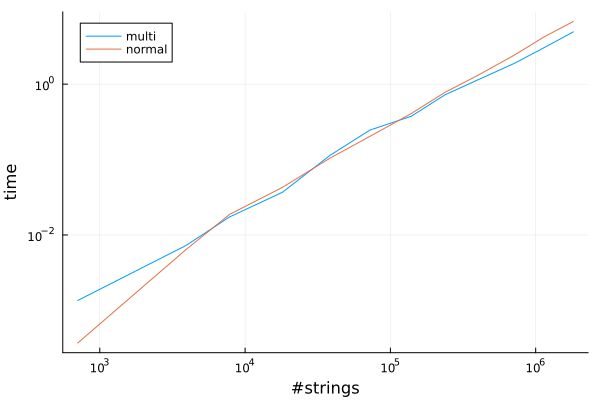

In [48]:
using Plots

plot(lengths_multi, times_multi, label="multi", xlabel="#strings", ylabel="time", legend=:topleft, xscale=:log10, yscale=:log10)
plot!(lengths_normal, times_normal, label="normal")

In [49]:
times_multi

12-element Vector{Float64}:
 0.001352875
 0.007282084
 0.017364125
 0.036871959
 0.11393025
 0.246413583
 0.375471542
 0.721661416
 1.145578583
 1.890785459
 3.049031583
 4.939147542

In [50]:
times_normal

12-element Vector{Float64}:
 0.000368917
 0.006438375
 0.018765666
 0.042809083
 0.104653875
 0.203485042
 0.407894291
 0.778445958
 1.31509125
 2.435434333
 4.241567834
 6.780974625